In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import pydotplus
import graphviz 

In [2]:
#匯入資料集

In [3]:
db = pd.read_csv(
    r'C:\Users\Tsai\Downloads\adult.data',
    header=None,
    names=['age', 'workclass', 'fnlwgt', 'education', 
           'education-num', 'marital-status', 'occupation',
           'relationship','race','sex','capital-gain',
           'capital-loss','hours-per-week','native-country','income']
)


In [4]:
#查看資料
db.shape

(32561, 15)

In [5]:
len(db)

32561

In [6]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [7]:
db['age'].value_counts(normalize=True)

36    0.027579
31    0.027272
34    0.027210
23    0.026934
35    0.026903
        ...   
83    0.000184
85    0.000092
88    0.000092
87    0.000031
86    0.000031
Name: age, Length: 73, dtype: float64

In [8]:
#fnlwgt無意義與其他不使用屬性

In [9]:
db.drop('fnlwgt', axis=1, inplace=True)
db.drop('education-num', axis=1, inplace=True)
db.drop('relationship', axis=1, inplace=True)
db.drop('native-country', axis=1, inplace=True)
db.drop('marital-status', axis=1, inplace=True)

In [10]:
#清除有?與unknown的資料

In [11]:
for i in db.columns:
    db[i].replace(' ?', inplace=True)
    db[i].replace('Unknown', inplace=True)

In [12]:
db.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   education       32561 non-null  object
 3   occupation      32561 non-null  object
 4   race            32561 non-null  object
 5   sex             32561 non-null  object
 6   capital-gain    32561 non-null  int64 
 7   capital-loss    32561 non-null  int64 
 8   hours-per-week  32561 non-null  int64 
 9   income          32561 non-null  object
dtypes: int64(4), object(6)
memory usage: 2.5+ MB


In [13]:
#將非數值型態欄位轉換為數值型態





In [14]:
#工作類別 workclass


In [15]:
db.loc[db['workclass'] == ' Private', 'workclass'] = 0
db.loc[db['workclass'] == ' Self-emp-not-inc', 'workclass'] = 1
db.loc[db['workclass'] == ' Self-emp-inc', 'workclass'] = 2
db.loc[db['workclass'] == ' Federal-gov', 'workclass'] = 3
db.loc[db['workclass'] == ' Local-gov', 'workclass'] = 4
db.loc[db['workclass'] == ' State-gov', 'workclass'] = 5
db.loc[db['workclass'] == ' Without-pay', 'workclass'] = 6
db.loc[db['workclass'] == ' Never-worked', 'workclass'] = 7

In [16]:
db.loc[db['education'] == ' Bachelors', 'education'] = 0
db.loc[db['education'] == ' Some-college', 'education'] = 1
db.loc[db['education'] == ' 11th', 'education'] = 2
db.loc[db['education'] == ' HS-grad', 'education'] = 3
db.loc[db['education'] == ' Prof-school', 'education'] = 4
db.loc[db['education'] == ' Assoc-acdm', 'education'] = 5
db.loc[db['education'] == ' Assoc-voc', 'education'] = 6
db.loc[db['education'] == ' 9th', 'education'] = 7
db.loc[db['education'] == ' 7th-8th', 'education'] = 8
db.loc[db['education'] == ' 12th', 'education'] = 9
db.loc[db['education'] == ' Masters', 'education'] = 10
db.loc[db['education'] == ' 1st-4th', 'education'] = 11
db.loc[db['education'] == ' 10th', 'education'] = 12
db.loc[db['education'] == ' Doctorate', 'education'] = 13
db.loc[db['education'] == ' 5th-6th', 'education'] = 14
db.loc[db['education'] == ' Preschool', 'education'] = 15

In [17]:
#職業 occupation

In [18]:
db.loc[db['occupation'] == ' Tech-support', 'occupation'] = 0
db.loc[db['occupation'] == ' Craft-repair', 'occupation'] = 1
db.loc[db['occupation'] == ' Other-service', 'occupation'] = 2
db.loc[db['occupation'] == ' Sales', 'occupation'] = 3
db.loc[db['occupation'] == ' Exec-managerial', 'occupation'] = 4
db.loc[db['occupation'] == ' Prof-specialty', 'occupation'] = 5
db.loc[db['occupation'] == ' Handlers-cleaners', 'occupation'] = 6
db.loc[db['occupation'] == ' Machine-op-inspct', 'occupation'] = 7
db.loc[db['occupation'] == ' Adm-clerical', 'occupation'] = 8
db.loc[db['occupation'] == ' Farming-fishing', 'occupation'] = 9
db.loc[db['occupation'] == ' Transport-moving', 'occupation'] = 10
db.loc[db['occupation'] == ' Priv-house-serv', 'occupation'] = 11
db.loc[db['occupation'] == ' Protective-serv', 'occupation'] = 12
db.loc[db['occupation'] == ' Armed-Forces', 'occupation'] = 13

In [19]:
#種族 race

In [20]:
db.loc[db['race'] == ' White', 'race'] = 0
db.loc[db['race'] == ' Asian-Pac-Islander', 'race'] = 1
db.loc[db['race'] == ' Amer-Indian-Eskimo', 'race'] = 2
db.loc[db['race'] == ' Other', 'race'] = 3
db.loc[db['race'] == ' Black', 'race'] = 4

In [21]:
#性別 sex

In [22]:
db.loc[db['sex'] == ' Female', 'sex'] = 0
db.loc[db['sex'] == ' Male', 'sex'] = 1

In [23]:
#分割feature attributes和class attributes

In [24]:
#分割測試與訓練集
x = db.drop(['income'], axis=1)
y = db['income']

In [25]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3)
train1=tree.DecisionTreeClassifier(criterion='entropy',max_depth=3).fit(xtrain,ytrain)#entropy
train1.score(xtrain,ytrain)

0.8026939276939277

In [26]:
train1.score(xtest,ytest)

0.8069403214249156

[Text(167.4, 190.26, 'X[6] <= 5119.0\nentropy = 0.798\nsamples = 22792\nvalue = [17282, 5510]'),
 Text(83.7, 135.9, 'X[0] <= 27.5\nentropy = 0.734\nsamples = 21709\nvalue = [17234, 4475]'),
 Text(41.85, 81.53999999999999, 'X[0] <= 24.5\nentropy = 0.164\nsamples = 5560\nvalue = [5426, 134]'),
 Text(20.925, 27.180000000000007, 'entropy = 0.049\nsamples = 3864\nvalue = [3843, 21]'),
 Text(62.775000000000006, 27.180000000000007, 'entropy = 0.353\nsamples = 1696\nvalue = [1583, 113]'),
 Text(125.55000000000001, 81.53999999999999, 'X[5] <= 0.5\nentropy = 0.84\nsamples = 16149\nvalue = [11808, 4341]'),
 Text(104.625, 27.180000000000007, 'entropy = 0.54\nsamples = 4912\nvalue = [4305, 607]'),
 Text(146.475, 27.180000000000007, 'entropy = 0.917\nsamples = 11237\nvalue = [7503, 3734]'),
 Text(251.10000000000002, 135.9, 'X[6] <= 7073.5\nentropy = 0.262\nsamples = 1083\nvalue = [48, 1035]'),
 Text(209.25, 81.53999999999999, 'X[6] <= 5316.5\nentropy = 0.896\nsamples = 112\nvalue = [35, 77]'),
 Text

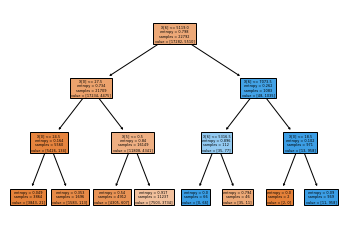

In [27]:
tree.plot_tree(train1,filled=True) 

In [28]:
names1=['age',  'education',   'occupation','race','sex','capital-gain','capital-loss','hours-per-week','income']

dot_data = tree.export_graphviz(train1,filled=True,feature_names=names1, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("adult") 

'adult.pdf'

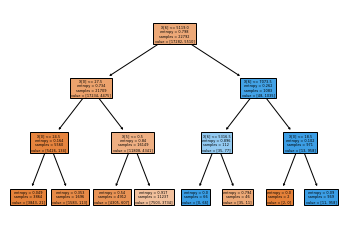

In [29]:
plt.figure()
tree.plot_tree(train1,filled=True)  
plt.savefig('tree.png',format='png',bbox_inches = "tight")


In [30]:
Result_PATH = 'D://adult_tree.xlsx'
writer = pd.ExcelWriter( Result_PATH , engine='xlsxwriter')
df_S1 = pd.DataFrame(xtest)

df_S1['predict'] = train1.predict(xtest)
df_S1['real_class'] = ytest
df_S1.to_excel(writer, sheet_name='SHEET1' ,index =False)

writer.save()
print( '成功產出'+Result_PATH )

成功產出D://adult_tree.xlsx


In [31]:
from sklearn.model_selection import GridSearchCV

In [ ]:
tree_params = {'max_depth': range(3, 14)}

locally_best_tree = GridSearchCV(DecisionTreeClassifier(random_state=17),
                                 tree_params, cv=5)

locally_best_tree.fit(xtrain, ytrain)

In [ ]:
print("最优深度：{}".format(locally_best_tree.best_params_))